Imports and 

In [9]:
from pathlib import Path
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from data_pipeline.data_loader import DataLoader
sys.path.append(os.path.abspath(".."))
from data_pipeline.preprocess import PreprocessData
from forex_python.converter import CurrencyRates

BASE_DIR = Path.cwd()  # Use os to get current working directory 

 # path to database 
df = pd.read_csv('./../data/unprocessed/expense_data_1.csv') # place csv in data frame for EDA

NameError: name 'sys' is not defined

In [10]:
df.describe()

,Subcategory,INR,Note.1,Amount,Account.1
count,0.0,277.000000,0.0,277.000000,277.000000
mean,NaN,410.750903,NaN,406.759134,406.759134
std,NaN,1065.756569,NaN,1065.158318,1065.158318
min,NaN,3.000000,NaN,3.000000,3.000000
25%,NaN,50.000000,NaN,50.000000,50.000000
50%,NaN,128.000000,NaN,125.000000,125.000000
75%,NaN,301.150000,NaN,300.000000,300.000000
max,NaN,10000.000000,NaN,10000.000000,10000.000000


In [9]:
#Check data in the dataframe
display(df.info, df.describe, df.dtypes)

<bound method DataFrame.info of                  Date               Account        Category  Subcategory  \
0      3/2/2022 10:11  CUB - online payment            Food          NaN   
1      3/2/2022 10:11  CUB - online payment           Other          NaN   
2      3/1/2022 19:50  CUB - online payment            Food          NaN   
3      3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4      3/1/2022 18:22  CUB - online payment            Food          NaN   
..                ...                   ...             ...          ...   
272  11/22/2021 14:16  CUB - online payment            Food          NaN   
273  11/22/2021 14:16  CUB - online payment            Food          NaN   
274  11/21/2021 17:07  CUB - online payment  Transportation          NaN   
275  11/21/2021 15:50  CUB - online payment            Food          NaN   
276  11/21/2021 13:30  CUB - online payment           Other          NaN   

                   Note     INR Income/Expense  Note.1 

<bound method NDFrame.describe of                  Date               Account        Category  Subcategory  \
0      3/2/2022 10:11  CUB - online payment            Food          NaN   
1      3/2/2022 10:11  CUB - online payment           Other          NaN   
2      3/1/2022 19:50  CUB - online payment            Food          NaN   
3      3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4      3/1/2022 18:22  CUB - online payment            Food          NaN   
..                ...                   ...             ...          ...   
272  11/22/2021 14:16  CUB - online payment            Food          NaN   
273  11/22/2021 14:16  CUB - online payment            Food          NaN   
274  11/21/2021 17:07  CUB - online payment  Transportation          NaN   
275  11/21/2021 15:50  CUB - online payment            Food          NaN   
276  11/21/2021 13:30  CUB - online payment           Other          NaN   

                   Note     INR Income/Expense  Note.

Date               object
Account            object
Category           object
Subcategory       float64
Note               object
INR               float64
Income/Expense     object
Note.1            float64
Amount            float64
Currency           object
Account.1         float64
dtype: object

In [10]:
# Subcategory and note removed due to NaN
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [41]:
#Dropped as redundant
df = df.drop(columns=["Subcategory", "Note.1"])
df.head()


,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0


In [3]:
c = CurrencyRates()

inr_to_gbp = c.get_rate('INR', 'GBP')


df['INR'] = df['INR'] * inr_to_gbp
df['Account.1'] * inr_to_gbp

print(df.head())

             Date               Account        Category  Subcategory  \
0  3/2/2022 10:11  CUB - online payment            Food          NaN   
1  3/2/2022 10:11  CUB - online payment           Other          NaN   
2  3/1/2022 19:50  CUB - online payment            Food          NaN   
3  3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4  3/1/2022 18:22  CUB - online payment            Food          NaN   

               Note       INR Income/Expense  Note.1  Amount Currency  \
0           Brownie  0.427950        Expense     NaN    50.0      INR   
1  To lended people  2.567700        Expense     NaN   300.0      INR   
2            Dinner  0.667602        Expense     NaN    78.0      INR   
3             Metro  0.256770        Expense     NaN    30.0      INR   
4            Snacks  0.573453        Expense     NaN    67.0      INR   

   Account.1  
0       50.0  
1      300.0  
2       78.0  
3       30.0  
4       67.0  


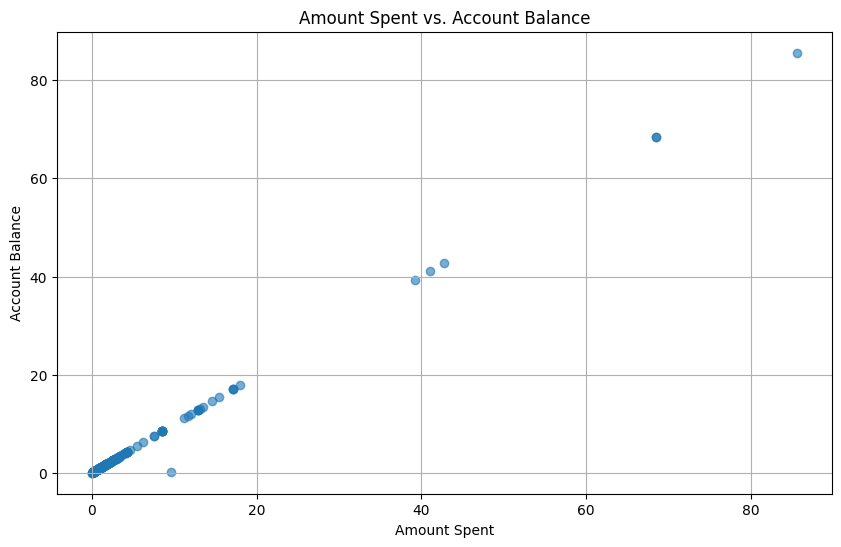

In [46]:
# 

filtered_df = df[df['Amount'] > 1]
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['INR'], filtered_df['Account.1'], alpha=0.6)
plt.xlabel("Amount Spent")
plt.ylabel("Account Balance")
plt.title("Amount Spent vs. Account Balance")
plt.grid(True)
plt.show()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,0.427950,Expense,50.0,INR,0.427950
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,2.567700,Expense,300.0,INR,2.567700
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,0.667602,Expense,78.0,INR,0.667602
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,0.256770,Expense,30.0,INR,0.256770
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,0.573453,Expense,67.0,INR,0.573453


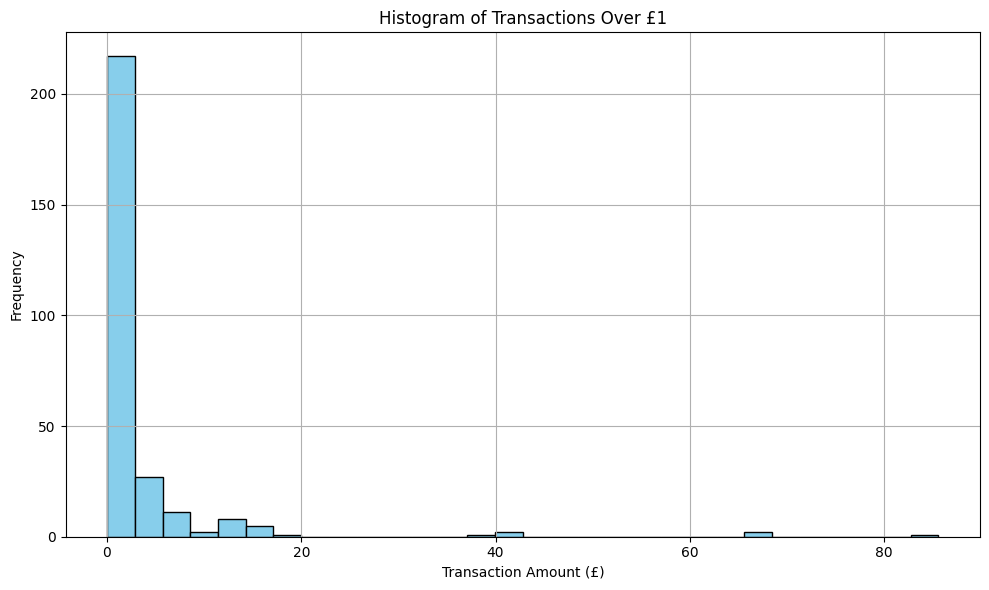

In [53]:
# Filter transactions where amount > 1
filtered_df = df[df['Amount'] > 1]

display(df.head())

# Plot a histogram showing the distribution of those amounts
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['INR'], bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Transactions Over £1")
plt.xlabel("Transaction Amount (£)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()